# Twitter API Authentication

In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Get Tweets

In [11]:
s = input("Enter topic string to be queried: ")
search_query = tw.Cursor(api.search_tweets, q=s, lang="en").items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in search_query]
print(tweets[0:5])

Enter topic string to be queried: elon
[{'Tweet': 'RT @LongDongDogelon: "Diamond Hands are Forever" starring Mars, Dogelon Mars $ELON @DogelonMars @DogelonWarriors @Whale__Tail https://t.co/…', 'Timestamp': datetime.datetime(2021, 12, 13, 12, 37, 38, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @Super_Thinkiing: It is possible for ordinary people to choose to be extraordinary.\n\n- Elon Musk', 'Timestamp': datetime.datetime(2021, 12, 13, 12, 37, 34, tzinfo=datetime.timezone.utc)}, {'Tweet': '$META is looking like the highest potential meme so far\nHow high will this go you think?\n0xbFa0D33F3155321934e4e433… https://t.co/AeFLWBotPs', 'Timestamp': datetime.datetime(2021, 12, 13, 12, 37, 34, tzinfo=datetime.timezone.utc)}, {'Tweet': 'Elon musks kid will never relate to trees. That’s all I’m saying', 'Timestamp': datetime.datetime(2021, 12, 13, 12, 37, 32, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @NexusVReality: Nexus has begun its digital scanning. Soon we will have a 3D explorable

In [12]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,"RT @LongDongDogelon: ""Diamond Hands are Foreve...",2021-12-13 12:37:38+00:00
1,RT @Super_Thinkiing: It is possible for ordina...,2021-12-13 12:37:34+00:00
2,$META is looking like the highest potential me...,2021-12-13 12:37:34+00:00
3,Elon musks kid will never relate to trees. Tha...,2021-12-13 12:37:32+00:00
4,RT @NexusVReality: Nexus has begun its digital...,2021-12-13 12:37:30+00:00


# Data Pre-Processing

In [14]:
import nltk
!pip install textblob
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', s]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [16]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Processed Tweet
0,"RT @LongDongDogelon: ""Diamond Hands are Foreve...",2021-12-13 12:37:38+00:00,"@LongDongDogelon: ""Diamond Hands Forever"" star..."
1,RT @Super_Thinkiing: It is possible for ordina...,2021-12-13 12:37:34+00:00,@Super_Thinkiing: It possible ordinary people ...
2,$META is looking like the highest potential me...,2021-12-13 12:37:34+00:00,$META looking like highest potential meme far ...
3,Elon musks kid will never relate to trees. Tha...,2021-12-13 12:37:32+00:00,Elon musk kid never relate trees. That’s I’m s...
4,RT @NexusVReality: Nexus has begun its digital...,2021-12-13 12:37:30+00:00,@NexusVReality: Nexus begun digital scanning. ...


In [17]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

# Visualize 

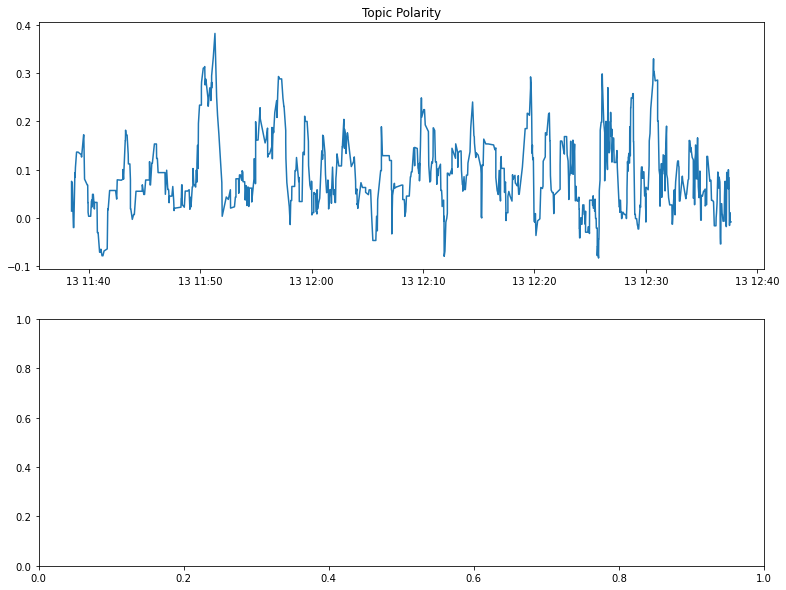

In [23]:
plotdf = df.sort_values(by='Timestamp', ascending=True)
plotdf['Moving Average Polarity'] = plotdf.polarity.rolling(10, min_periods=3).mean()

fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(plotdf['Timestamp'], plotdf['Moving Average Polarity'])
axes[0].set_title("\n".join(["Topic Polarity"]))

plt.show()